In [1]:
import sys
!{sys.executable} -m pip install opencv-python
import cv2
!{sys.executable} -m pip install matplotlib
from matplotlib import pyplot as plt
!{sys.executable} -m pip install numpy
import numpy as np  
from math import atan2, cos, sin, sqrt, pi
from glob import glob
import os

In [2]:
filepaths = glob("sample/**/*.png", recursive=True)
print(filepaths[:10])

['sample/acumed ex5 at 10.25.26 AM.png', 'sample/synthes va ex3 at 4.31.53 AM (1).png', 'sample/Acumed ex2 at 9.50.35 AM.png', 'sample/acumed ex5 at 10.25.02 AM (1).png', 'sample/synthes va ex1-8.png', 'sample/synthes va ex2 at 4.18.08 AM (1).png', 'sample/Acumed ex2 at 9.50.42 AM.png', 'sample/acumed ex5 at 10.25.20 AM.png', 'sample/Acumed ex2 at 9.50.59 AM.png', 'sample/synthes va ex2 at 4.18.04 AM.png']


In [3]:
images = {}
grayScale = {}

for filepath in filepaths:
    image = cv2.imread(filepath)
    dim = (200, np.floor(image.shape[0] / image.shape[1] * 200 ).astype(int))
    image = cv2.resize(image, dim)
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    images[filepath] = image
    grayScale[filepath] = gray

[[40764.]
 [11160.]
 [11876.]]
sample/acumed ex5 at 10.25.26 AM.png


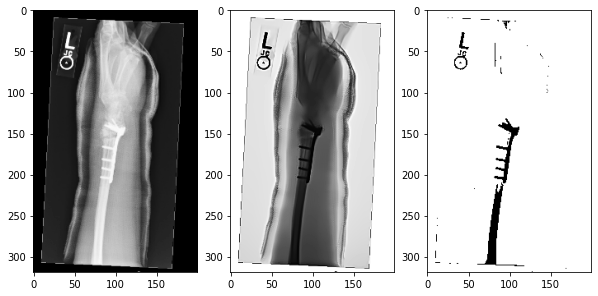

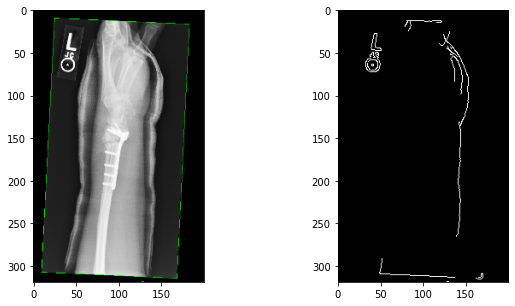

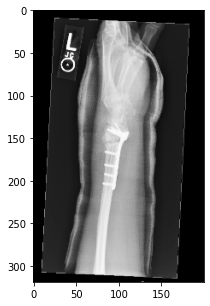

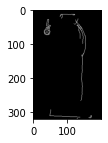

[[38765.]
 [12970.]
 [ 2665.]]
sample/synthes va ex3 at 4.31.53 AM (1).png


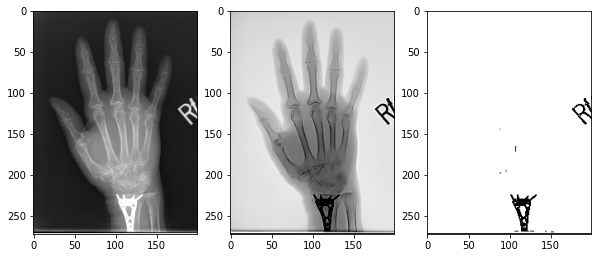

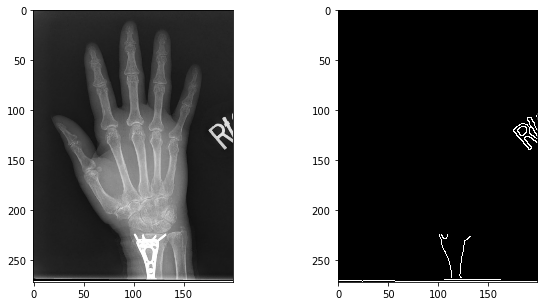

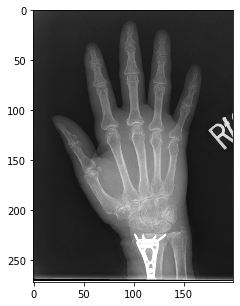

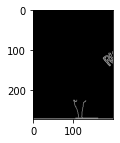

[[46180.]
 [10983.]
 [ 4637.]]
sample/Acumed ex2 at 9.50.35 AM.png


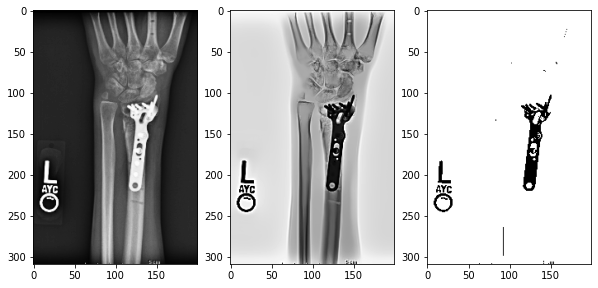

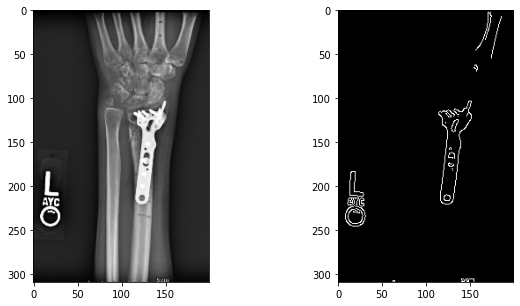

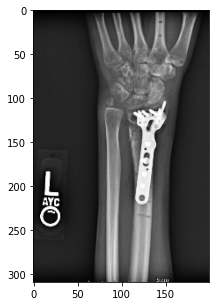

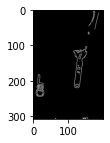

[[32662.]
 [ 6432.]
 [ 2506.]]
sample/acumed ex5 at 10.25.02 AM (1).png


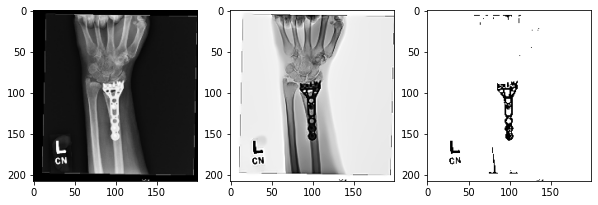

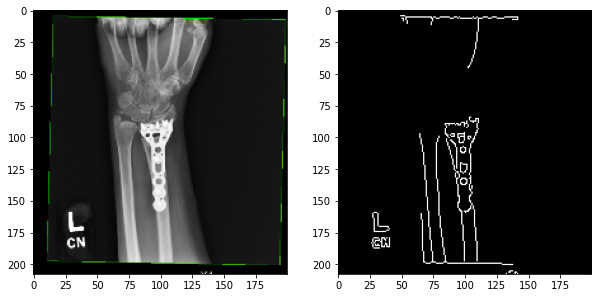

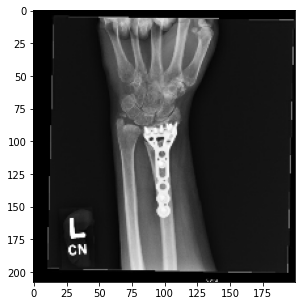

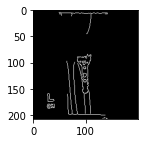

[[10717.]
 [14823.]
 [22260.]]
sample/synthes va ex1-8.png


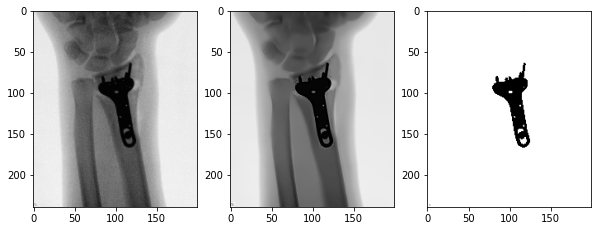

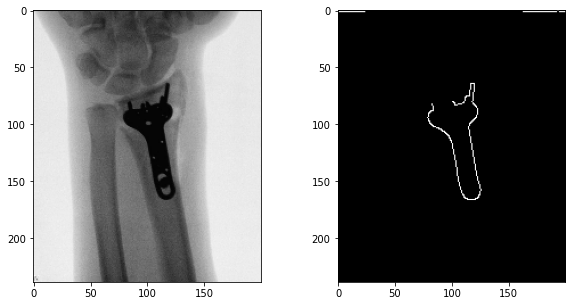

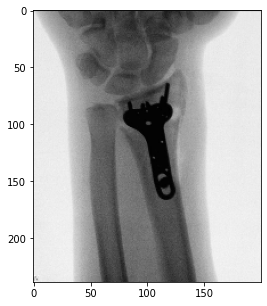

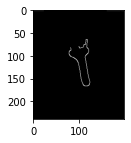

[[22437.]
 [23729.]
 [16434.]]
sample/synthes va ex2 at 4.18.08 AM (1).png


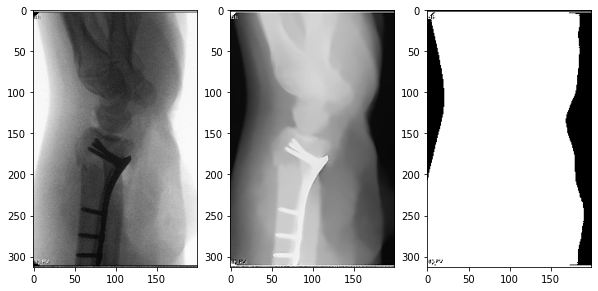

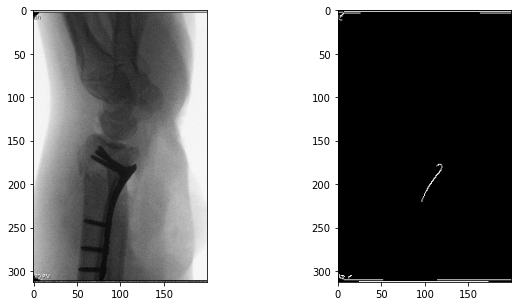

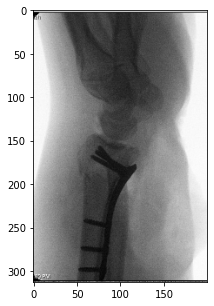

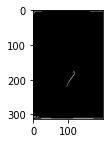

[[51504.]
 [ 9228.]
 [ 5268.]]
sample/Acumed ex2 at 9.50.42 AM.png


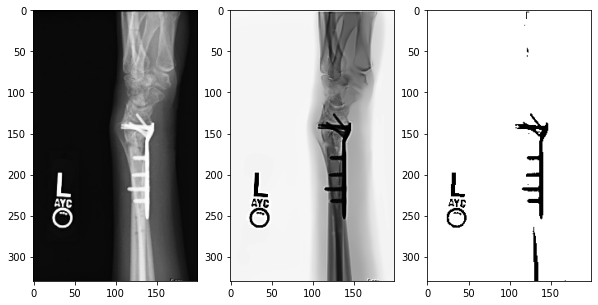

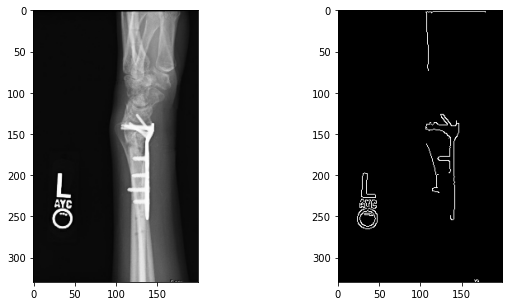

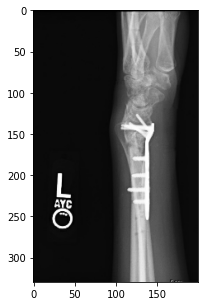

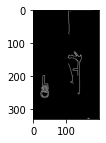

[[42238.]
 [13180.]
 [ 7782.]]
sample/acumed ex5 at 10.25.20 AM.png


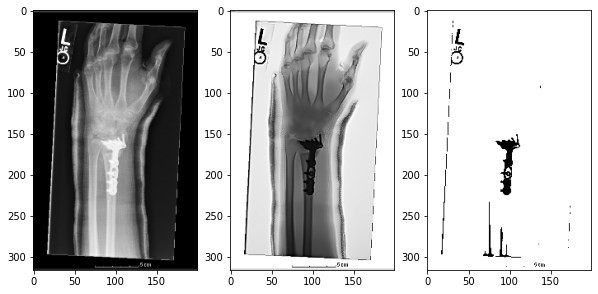

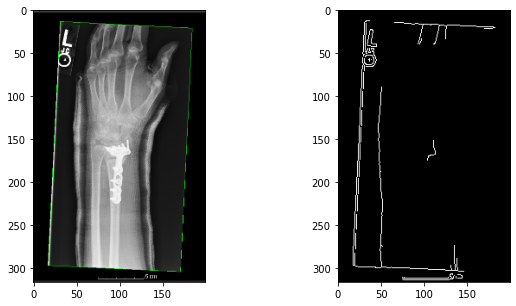

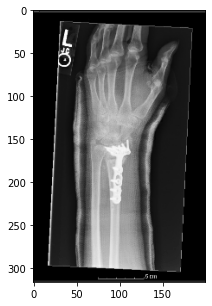

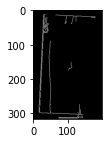

[[67044.]
 [ 9569.]
 [ 2587.]]
sample/Acumed ex2 at 9.50.59 AM.png


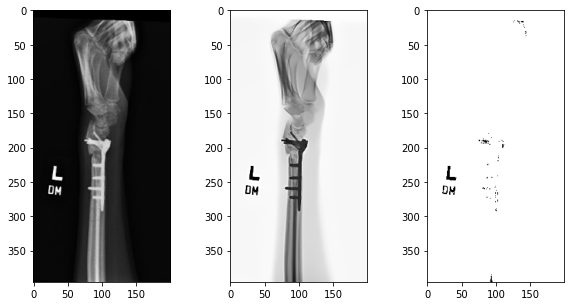

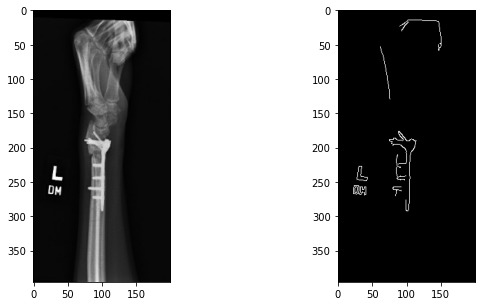

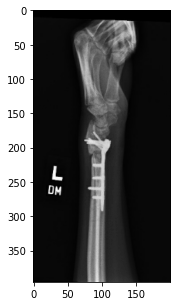

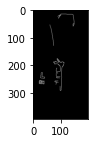

[[ 1891.]
 [21149.]
 [25760.]]
sample/synthes va ex2 at 4.18.04 AM.png


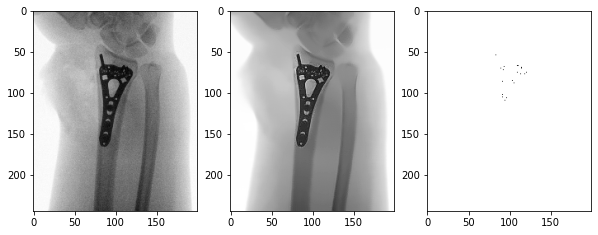

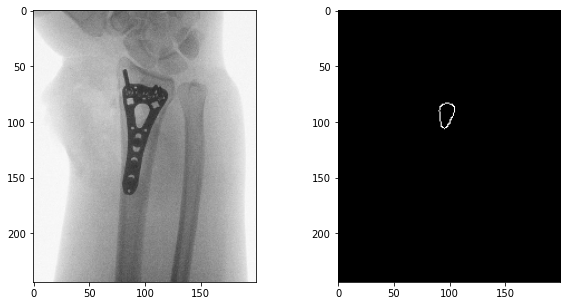

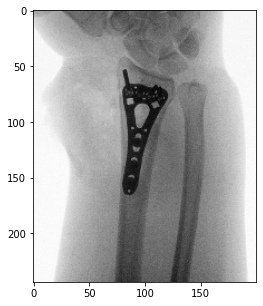

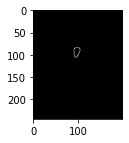

[[56902.]
 [ 8029.]
 [ 2469.]]
sample/Acumed ex2 at 9.51.06 AM.png


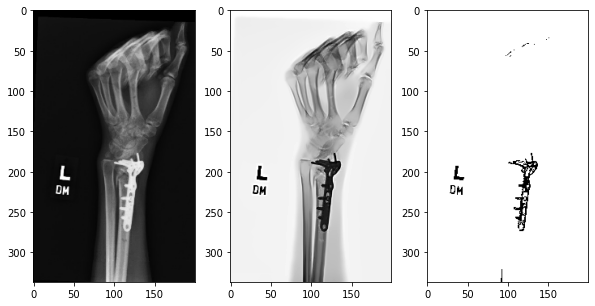

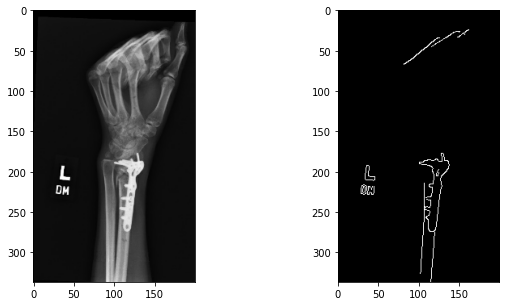

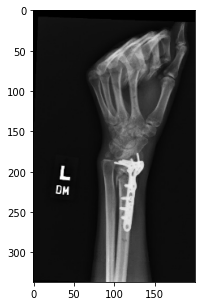

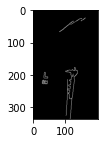

[[55204.]
 [ 8258.]
 [ 1938.]]
sample/synthes va ex5 at 10.56.24 AM (1).png


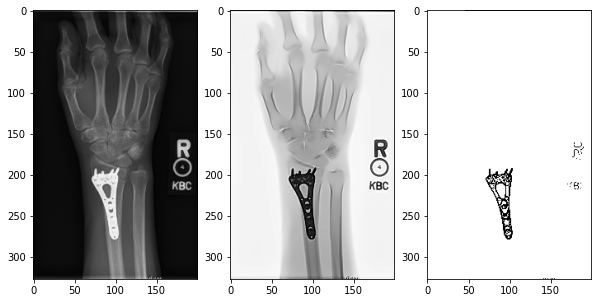

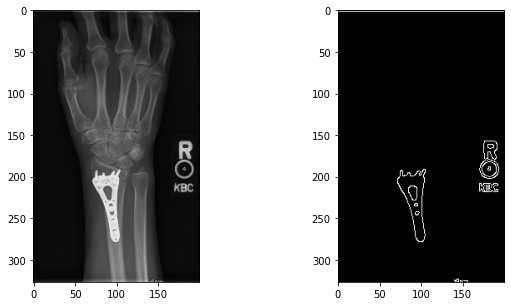

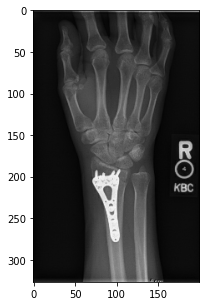

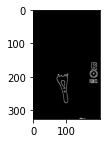

[[ 3876.]
 [11659.]
 [28465.]]
sample/acumed ex1 at 2.22.36 PM (1).png


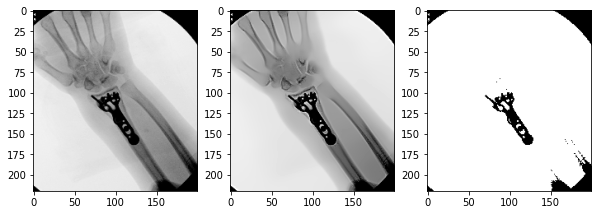

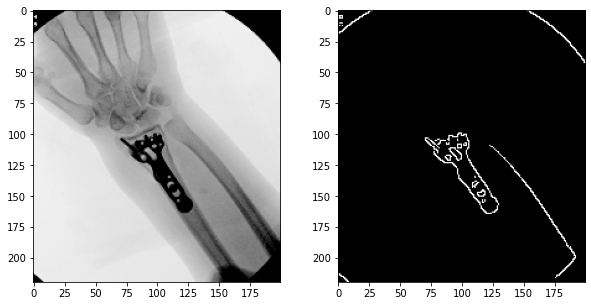

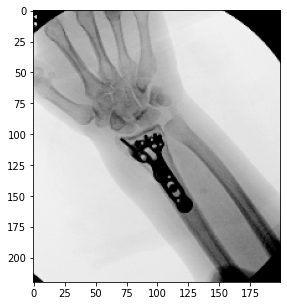

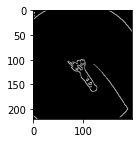

[[ 4003.]
 [ 3538.]
 [45859.]]
sample/synthes va ex5 at 2.22.45 PM.png


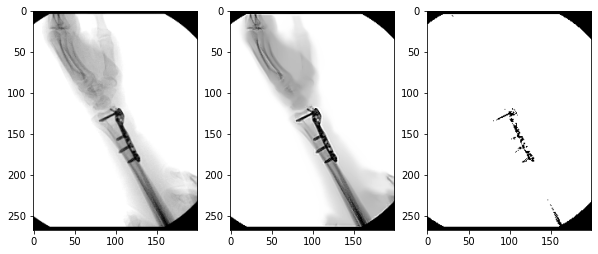

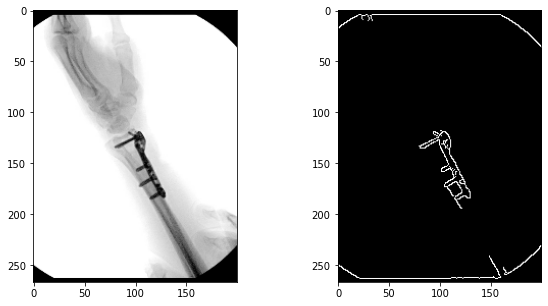

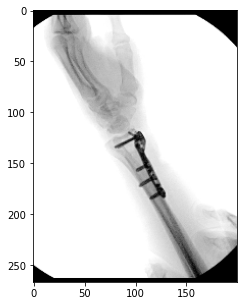

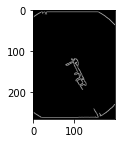

[[39662.]
 [ 9002.]
 [ 3336.]]
sample/acumed ex3 at 9.58.37 AM.png


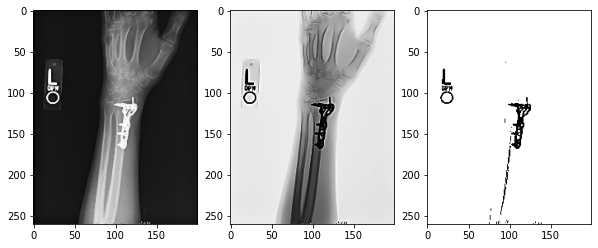

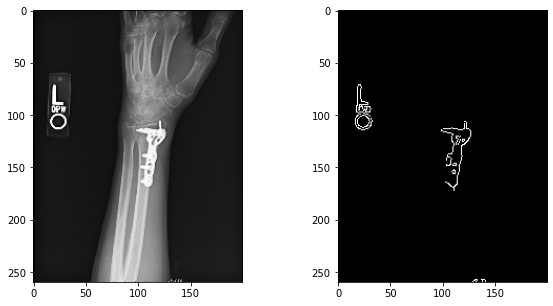

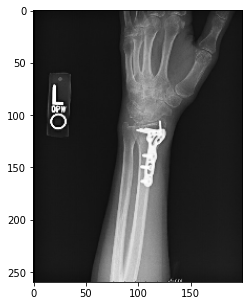

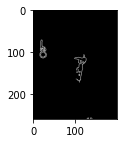

[[11795.]
 [17740.]
 [63665.]]
sample/template.png


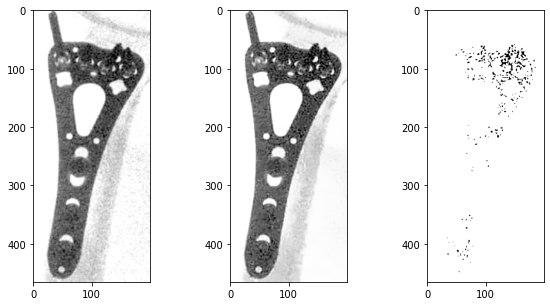

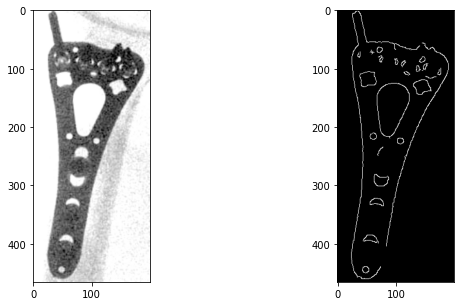

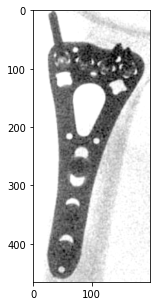

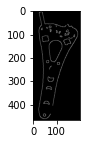

[[17155.]
 [19753.]
 [31892.]]
sample/acumed ex3 at 2.19.58 PM.png


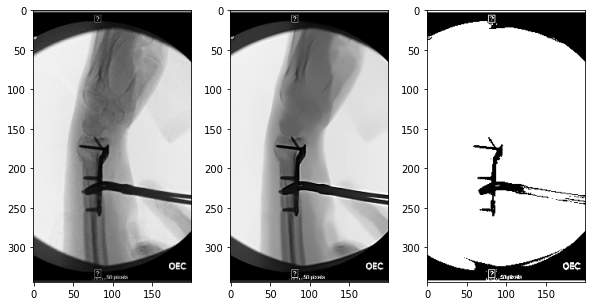

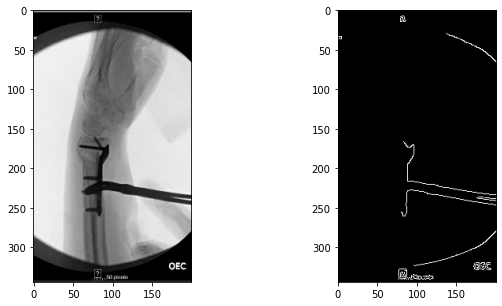

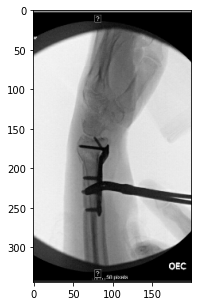

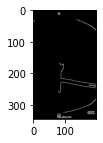

[[41480.]
 [ 8162.]
 [ 3958.]]
sample/synthes va ex5 at 10.57.20 AM (1).png


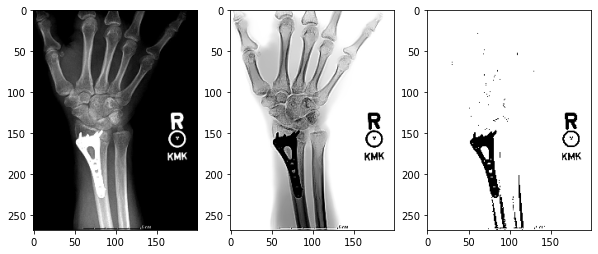

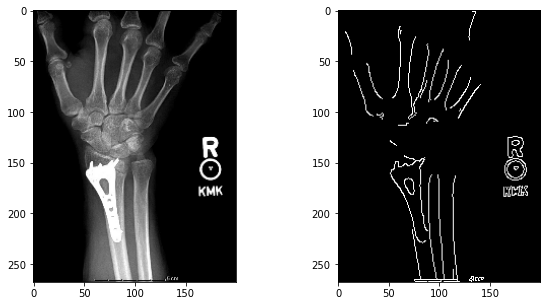

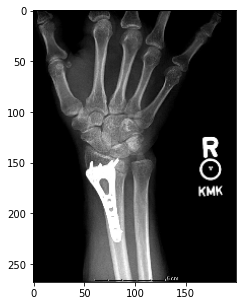

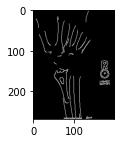

[[13698.]
 [17834.]
 [25468.]]
sample/acumed ex3 at 2.20.05 PM.png


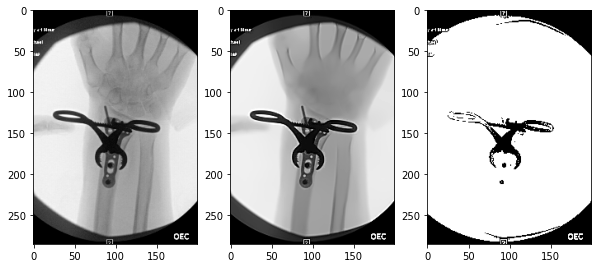

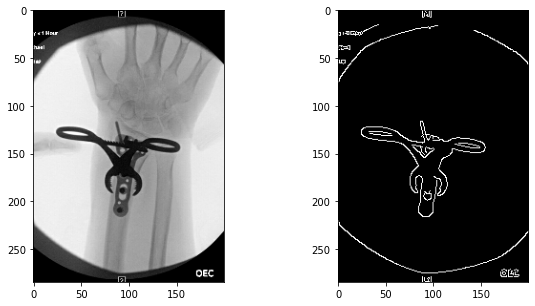

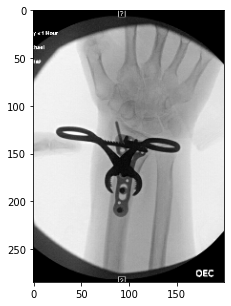

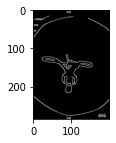

[[31374.]
 [19346.]
 [ 6080.]]
sample/acumed ex1 at 9.47.15 AM.png


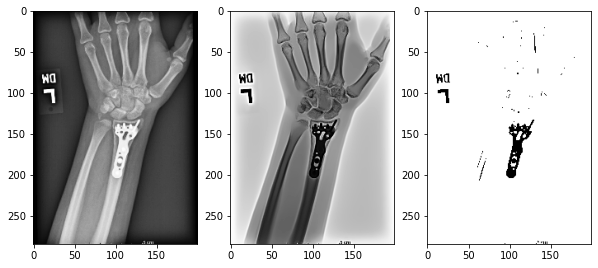

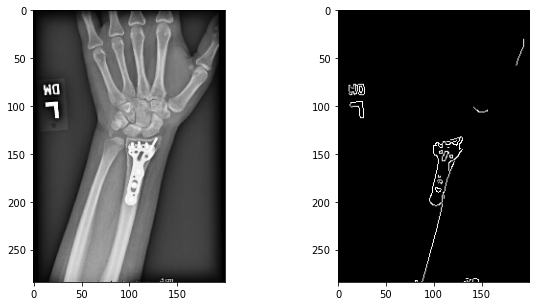

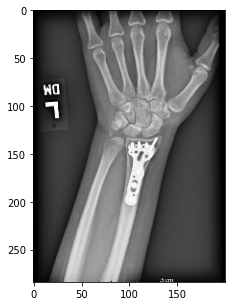

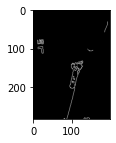

[[50405.]
 [13268.]
 [ 7727.]]
sample/acumed ex5 at 10.13.43 AM (1).png


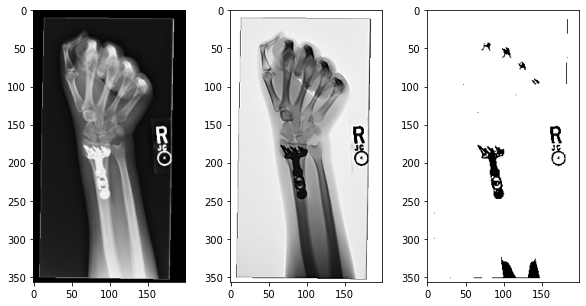

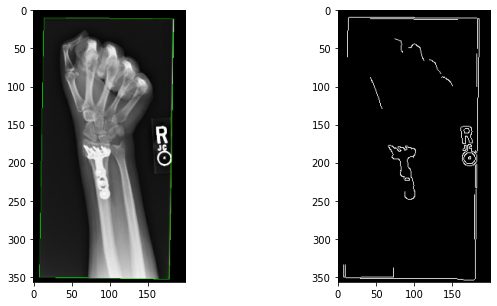

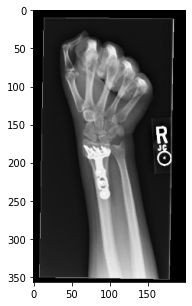

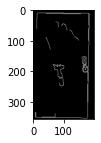

[[11233.]
 [41615.]
 [ 6552.]]
sample/synthes va ex5 at 2.29.45 PM (1).png


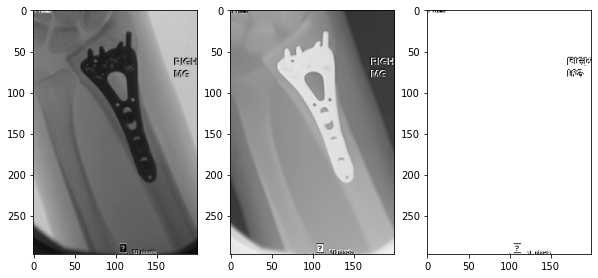

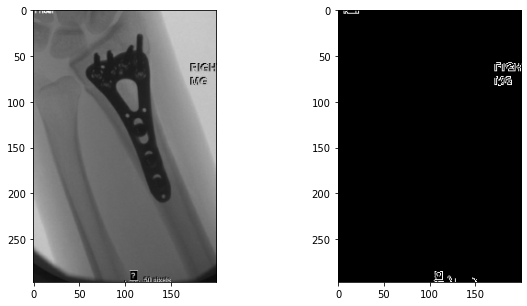

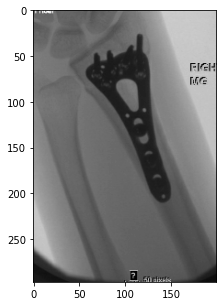

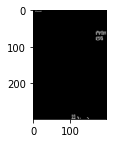

In [4]:
edgeMaps = {}

template = cv2.imread("sample/template.png")
template = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']



for filepath, gray in grayScale.items():
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # sharpen image using unsharp masking
    edited = cv2.addWeighted(gray, 2.0, blurred, -1.0, 0)

    # noise cancelling
    edited = cv2.fastNlMeansDenoising(edited, None, 10, 7, 21)


    hist = cv2.calcHist([edited], [0], None, [3], [0, 256])

    # max bin value
    max_bin = hist[0].argmax()
    print(hist)

    # if black on white then invert
    if hist[0] > hist[2]:
        edited = cv2.bitwise_not(edited)

    # thresholding
    _, thresholded = cv2.threshold(edited,30,255,cv2.THRESH_BINARY)




    # edges = cv2.Canny(edited, 300, 600)

    print(filepath)
    plt.rcParams['figure.figsize'] = [10, 5]
    f, axarr = plt.subplots(1,3)
    axarr[0].imshow(gray, cmap='gray')
    axarr[1].imshow(edited, cmap='gray')
    axarr[2].imshow(thresholded, cmap='gray')
    # axarr[2].imshow(edges, cmap='gray')
    plt.show()



    edges = cv2.Canny(gray, 240, 600)
    
    edgeMaps[filepath] = edges
    
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(images[filepath])
    f.add_subplot(1,2, 2)
    plt.imshow(edges, cmap='gray')
    plt.show(block=True)
    plt.imshow(gray,cmap = 'gray')
    plt.figure(figsize = (2,2))
    plt.imshow(edges,cmap = 'gray')
    plt.show(block=True)
    edgeMaps[filepath] = edges

In [5]:
# def unit_vector(vector):
#     """ Returns the unit vector of the vector.  """
#     return vector / np.linalg.norm(vector)

# def angle_between(v1, v2):
#     """ Returns the angle in radians between vectors 'v1' and 'v2'::

#             >>> angle_between((1, 0, 0), (0, 1, 0))
#             1.5707963267948966
#             >>> angle_between((1, 0, 0), (1, 0, 0))
#             0.0
#             >>> angle_between((1, 0, 0), (-1, 0, 0))
#             3.141592653589793
#     """
#     v1_u = unit_vector(v1)
#     v2_u = unit_vector(v2)
#     return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

# def rotate_image(image, angle):
#   image_center = tuple(np.array(image.shape[1::-1]) / 2)
#   rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
#   result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
#   return result

# def crop_minAreaRect(img, rect):

#     # rotate img
#     angle = rect[2]
#     rows,cols = img.shape[0], img.shape[1]
#     M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
#     img_rot = cv2.warpAffine(img,M,(cols,rows))

#     # rotate bounding box
#     rect0 = (rect[0], rect[1], 0.0) 
#     box = cv2.boxPoints(rect0)
#     pts = np.int0(cv2.transform(np.array([box]), M))[0]    
#     pts[pts < 0] = 0

#     # crop
#     img_crop = img_rot[pts[1][1]:pts[0][1], 
#                        pts[1][0]:pts[2][0]]
    
#     # print('rect params', pts[:,1],pts[:,0])

#     return ([pts[1][1], pts[0][1]],[pts[1][0], pts[2][0]])
#     # return img_crop

# def get_orientation(pts, img):
#     sz = len(pts)
#     data_pts = np.empty((sz, 2), dtype=np.float64)
#     for i in range(data_pts.shape[0]):
#         data_pts[i,0] = pts[i,0,0]
#         data_pts[i,1] = pts[i,0,1]
#     # Perform PCA analysis
#     mean = np.empty((0))
#     mean, eigenvectors, eigenvalues = cv2.PCACompute2(data_pts, mean)
#     # Store the center of the object
#     cntr = (int(mean[0,0]), int(mean[0,1]))
#     # cv2.circle(img, cntr, 3, (255, 0, 255), 2)
#     print('ev', eigenvectors[0])
#     p1 = (cntr[0] + 0.02 * eigenvectors[0,0] * eigenvalues[0,0], cntr[1] + 0.02 *  eigenvectors[0,1] * eigenvalues[0,0])
#     p2 = (cntr[0] - 0.02 * eigenvectors[1,0] * eigenvalues[1,0], cntr[1] - 0.02 * eigenvectors[1,1] * eigenvalues[1,0])
#     # draw_axis(img, cntr, p1, (0, 150, 0), 1)
#     # draw_axis(img, cntr, p2, (200, 150, 0), 5)
#     # angle = atan2(eigenvectors[0,1], eigenvectors[0,0]) / pi * 180# orientation in radians
    
#     v1_u = unit_vector((1, 0))
#     v2_u = unit_vector(eigenvectors[0])
#     return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))
#     return angle

# def draw_axis(img, p_, q_, colour, scale):
#     p = list(p_)
#     q = list(q_)
#     print('q', q)
#     angle = atan2(p[1] - q[1], p[0] - q[0]) # angle in radians
#     hypotenuse = sqrt((p[1] - q[1]) * (p[1] - q[1]) + (p[0] - q[0]) * (p[0] - q[0]))
#     # Here we lengthen the arrow by a factor of scale
#     q[0] = p[0] - scale * hypotenuse * cos(angle)
#     q[1] = p[1] - scale * hypotenuse * sin(angle)
#     cv2.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), colour, 1, cv2.LINE_AA)
#     # create the arrow hooks
#     p[0] = q[0] + 9 * cos(angle + pi / 4)
#     p[1] = q[1] + 9 * sin(angle + pi / 4)
#     cv2.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), colour, 1, cv2.LINE_AA)
#     p[0] = q[0] + 9 * cos(angle - pi / 4)
#     p[1] = q[1] + 9 * sin(angle - pi / 4)
#     cv2.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), colour, 1, cv2.LINE_AA)

num contours:  15


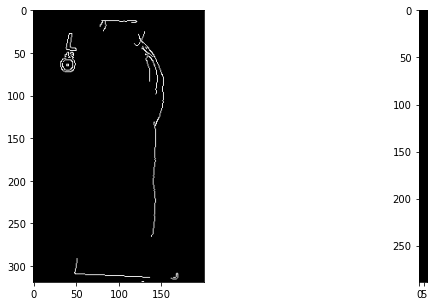

old path sample/acumed ex5 at 10.25.26 AM.png
new filepath sample/acumed ex5 at 10.25.26 AM.png
num contours:  9


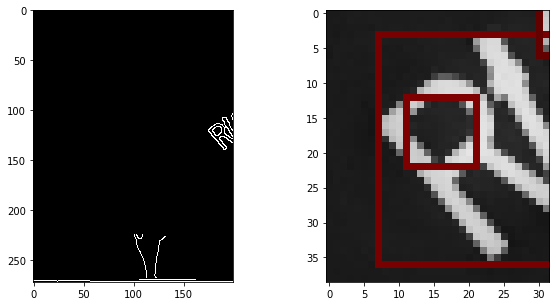

old path sample/synthes va ex3 at 4.31.53 AM (1).png
new filepath sample/synthes va ex3 at 4.31.53 AM (1).png
num contours:  31


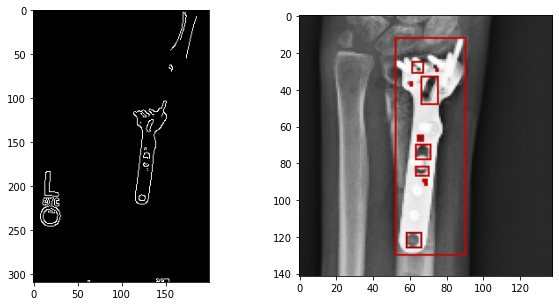

old path sample/Acumed ex2 at 9.50.35 AM.png
new filepath sample/Acumed ex2 at 9.50.35 AM.png
num contours:  29


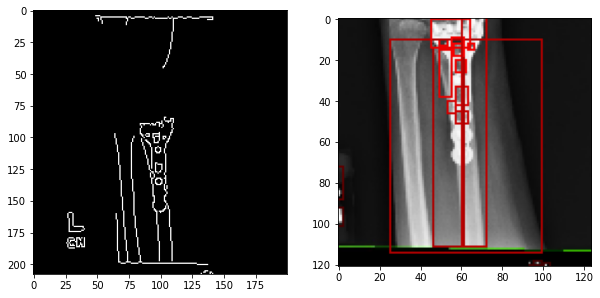

old path sample/acumed ex5 at 10.25.02 AM (1).png
new filepath sample/acumed ex5 at 10.25.02 AM (1).png
num contours:  3


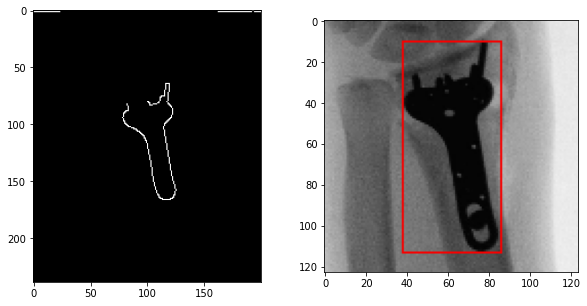

old path sample/synthes va ex1-8.png
new filepath sample/synthes va ex1-8.png
num contours:  10


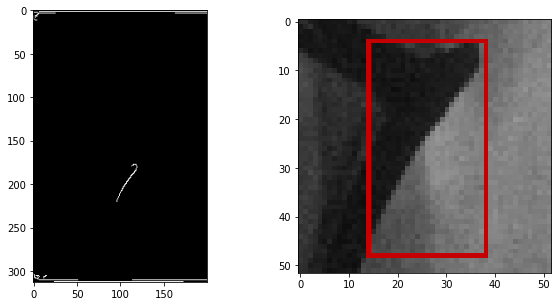

old path sample/synthes va ex2 at 4.18.08 AM (1).png
new filepath sample/synthes va ex2 at 4.18.08 AM (1).png
num contours:  14


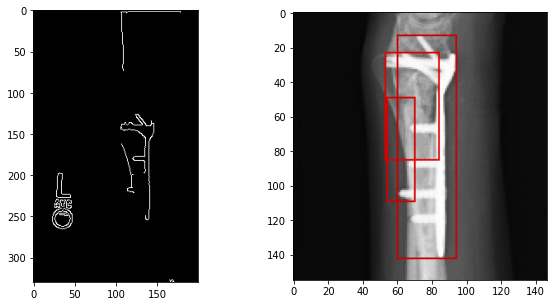

old path sample/Acumed ex2 at 9.50.42 AM.png
new filepath sample/Acumed ex2 at 9.50.42 AM.png
num contours:  22


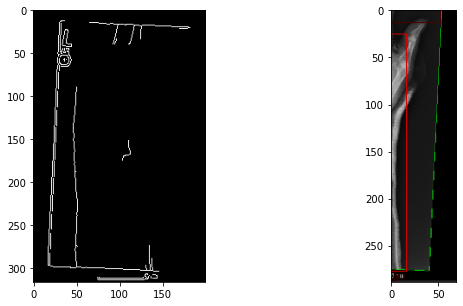

old path sample/acumed ex5 at 10.25.20 AM.png
new filepath sample/acumed ex5 at 10.25.20 AM.png
num contours:  13


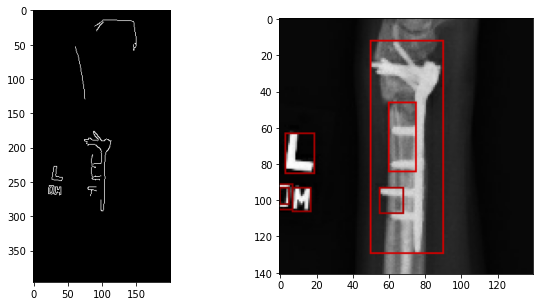

old path sample/Acumed ex2 at 9.50.59 AM.png
new filepath sample/Acumed ex2 at 9.50.59 AM.png
num contours:  2


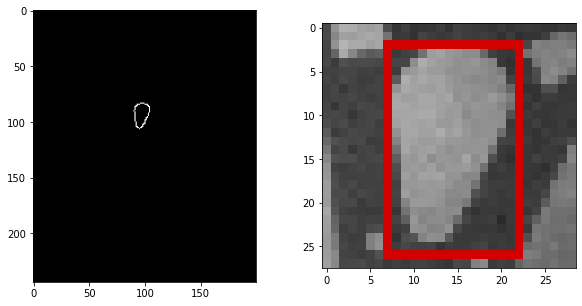

old path sample/synthes va ex2 at 4.18.04 AM.png
new filepath sample/synthes va ex2 at 4.18.04 AM.png
num contours:  13


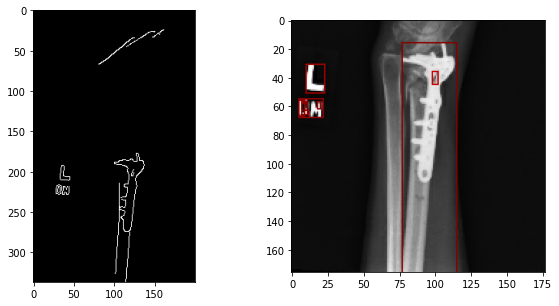

old path sample/Acumed ex2 at 9.51.06 AM.png
new filepath sample/Acumed ex2 at 9.51.06 AM.png
num contours:  30


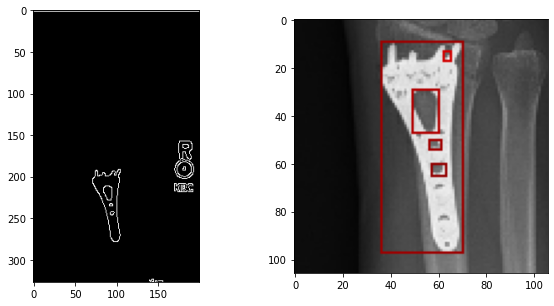

old path sample/synthes va ex5 at 10.56.24 AM (1).png
new filepath sample/synthes va ex5 at 10.56.24 AM (1).png
num contours:  27


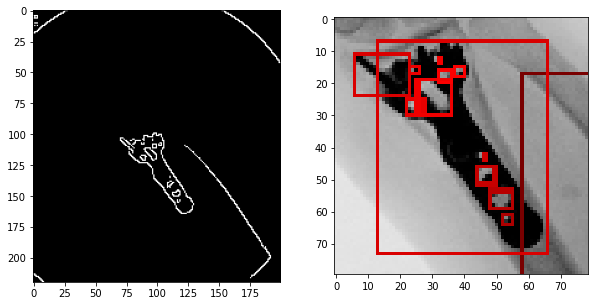

old path sample/acumed ex1 at 2.22.36 PM (1).png
new filepath sample/acumed ex1 at 2.22.36 PM (1).png
num contours:  11


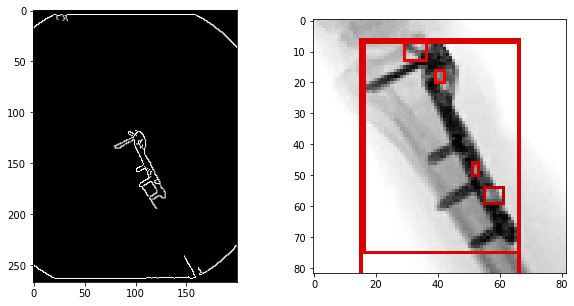

old path sample/synthes va ex5 at 2.22.45 PM.png
new filepath sample/synthes va ex5 at 2.22.45 PM.png
num contours:  21


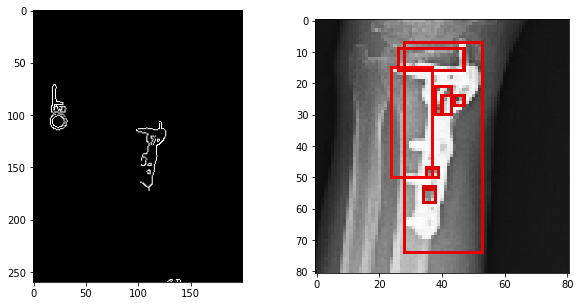

old path sample/acumed ex3 at 9.58.37 AM.png
new filepath sample/acumed ex3 at 9.58.37 AM.png
num contours:  42


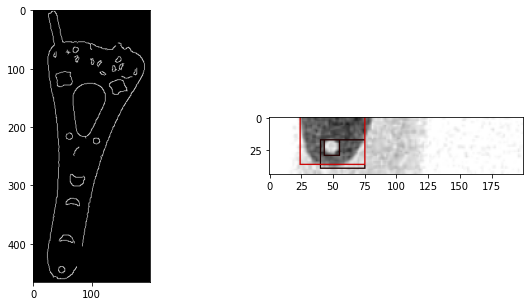

old path sample/template.png
new filepath sample/template.png
num contours:  23


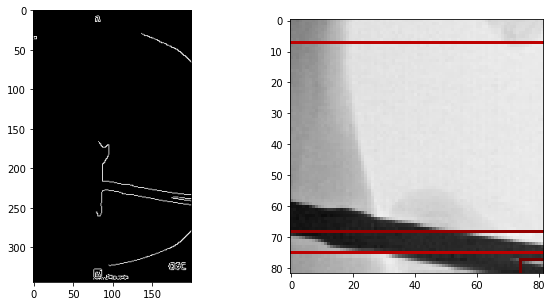

old path sample/acumed ex3 at 2.19.58 PM.png
new filepath sample/acumed ex3 at 2.19.58 PM.png
num contours:  41


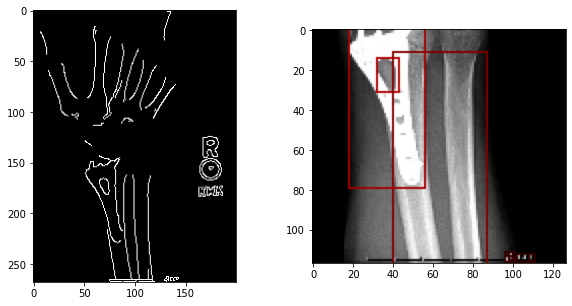

old path sample/synthes va ex5 at 10.57.20 AM (1).png
new filepath sample/synthes va ex5 at 10.57.20 AM (1).png
num contours:  39


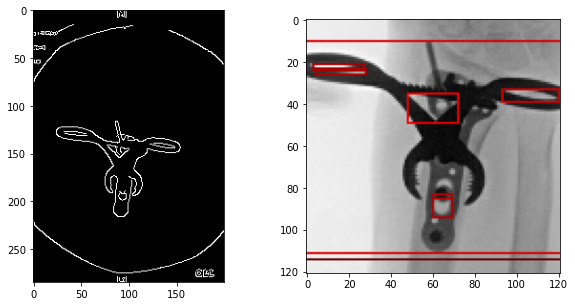

old path sample/acumed ex3 at 2.20.05 PM.png
new filepath sample/acumed ex3 at 2.20.05 PM.png
num contours:  27


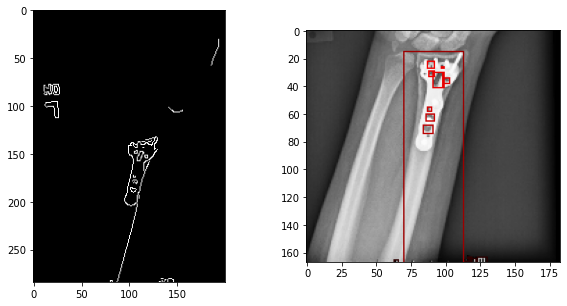

old path sample/acumed ex1 at 9.47.15 AM.png
new filepath sample/acumed ex1 at 9.47.15 AM.png
num contours:  22
zero-size array to reduction operation minimum which has no identity
num contours:  20


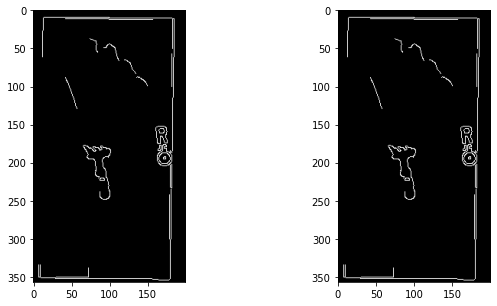

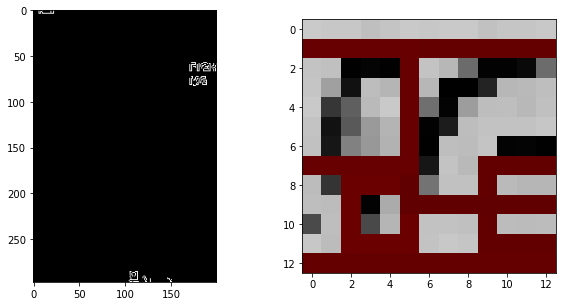

old path sample/synthes va ex5 at 2.29.45 PM (1).png
new filepath sample/synthes va ex5 at 2.29.45 PM (1).png


In [6]:
final = {}

for filepath, edges in list(edgeMaps.items()):
    
    try:

        retval, thresh_gray = cv2.threshold(edges, thresh=240, maxval=300, \
                                        type=cv2.THRESH_BINARY)

        contours, hierarchy = cv2.findContours(thresh_gray,cv2.RETR_LIST, \
                                        cv2.CHAIN_APPROX_SIMPLE)

        print('num contours: ', len(contours))
        
        image = images[filepath].copy()


        # Find object with the biggest bounding box
        mx = (0,0,0,0)      # biggest bounding box so far
        mx_score = 0
        mx_cont = None
        for cont in contours:
            x,y,w,h = cv2.boundingRect(cont)
            area = w*h
            rectCenter = (x + w/2, y + h/2)
            imageCenter = (image.shape[1]/2, image.shape[0]/2)
            distToCenter = 0.1 + sqrt((rectCenter[0] - imageCenter[0])**2 + (rectCenter[1] - imageCenter[1])**2) / sqrt(imageCenter[0]**2 + imageCenter[1]**2) * 255
            
            # print(rectCenter, imageCenter)
            score = area / distToCenter
            cv2.rectangle(image,(x,y),(x+w,y+h),(255 - distToCenter,0,0),1)
            if score > mx_score and area < 0.6 * image.shape[0] * image.shape[1]:
                mx = x,y,w,h
                mx_cont = cont
                mx_score = score
        x,y,w,h = mx
        f = plt.figure()
        f.add_subplot(1,2, 1)
        plt.imshow(edges, cmap='gray')
        f.add_subplot(1,2, 2)
        plt.imshow(edges, cmap='gray')
        
        xc = x + w/2
        yc = y + h/2
        
        
        # cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
        # cv2.rectangle(image,(round(xc - h/2),round(yc - h/2)),(round(xc + h/2),round(yc + h/2)),(0,255,0),2)
        # plt.imshow(image)
        
        # min rect bounds
        # rect = cv2.minAreaRect(mx_cont)
        # box = cv2.boxPoints(rect)
        # box = np.int0(box)
        # cv2.drawContours(image,[box],0,(0,191,255),2)
        # angle = get_orientation(mx_cont, image)
        # rotated= rotate_image(image, angle)
        halfSideLength = h / 2 * 1.2
        cropped = image[round(yc - halfSideLength):round(yc + halfSideLength), round(xc - halfSideLength):round(xc + halfSideLength)]
        plt.imshow(cropped, cmap='gray')
        
        plt.show(block=True)
        
        print('old path', filepath)
        filepath = filepath.replace('images', 'images_processed')
        
        try:
            os.makedirs('/'.join(filepath.split('/')[:-1]))
        except Exception as e:
            pass
        print('new filepath', filepath)
        # cv2.imwrite(filepath, cropped)
        
    except Exception as e:
        print(e)

In [7]:
edgeMaps

{'sample/acumed ex5 at 10.25.26 AM.png': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'sample/synthes va ex3 at 4.31.53 AM (1).png': array([[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8),
 'sample/Acumed ex2 at 9.50.35 AM.png': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'sample/acumed ex5 at 10.25.02 AM (1).png': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0,